<h1>Зачет по МФК Математическая статистика и анализ данных</h1>
Щепетов М. А., ФББ, 3 курс

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,8)})

from sklearn.linear_model import LinearRegression
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


np.random.seed(1)


<h2>Подготовка данных</h2>

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC"
!mv u* ./flights_NY.csv

--2024-05-10 10:55:12--  https://drive.google.com/uc?export=download&id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC
Resolving drive.google.com (drive.google.com)... 172.253.122.138, 172.253.122.139, 172.253.122.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC&export=download [following]
--2024-05-10 10:55:12--  https://drive.usercontent.google.com/download?id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19260131 (18M) [application/octet-stream]
Saving to: ‘uc?export=download&id=1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC’

uc?export=downloa

In [ ]:
#загрузка датасета
df = pd.read_csv('./flights_NY.csv')
print('Количество строк в датасете до фильтрации', len(df))

#очистка от строк с пропущенными значениями
df = df.dropna()
print('Количество строк в датасете после фильтрации', len(df))

Количество строк в датасете до фильтрации 336776
Количество строк в датасете после фильтрации 327346


<h2>Задание 1</h2>

***По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и нарисуйте график, показывающий распределение этой вероятности по авиакомпаниям.***


<ipython-input-6-6915035feac3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arr_delay_01'] = (df['arr_delay'] > 0)


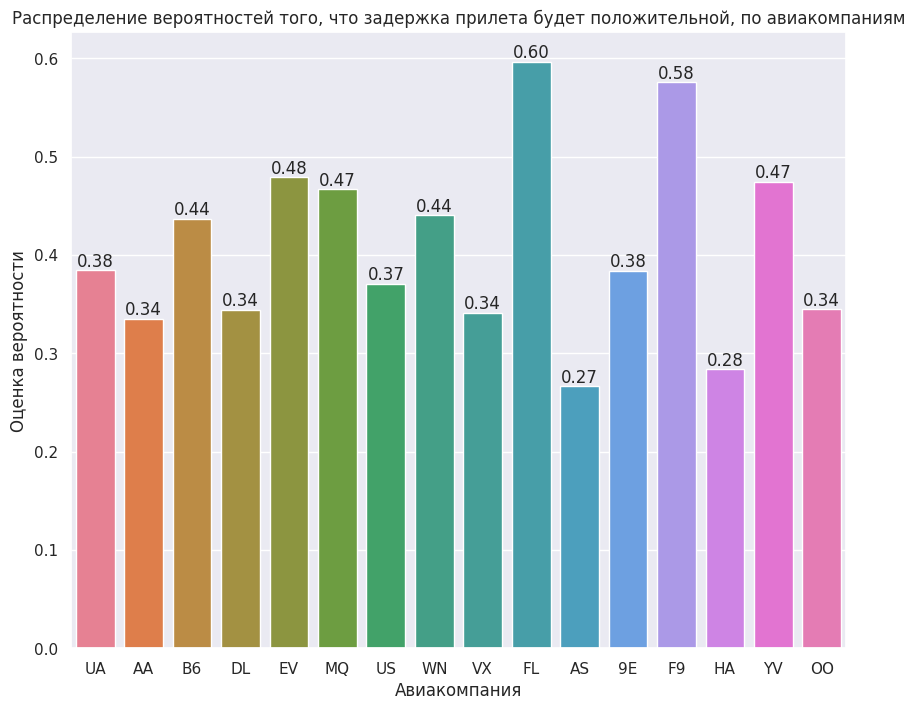

In [ ]:
df['arr_delay_01'] = (df['arr_delay'] > 0)


ax = sns.barplot(x='carrier', y='arr_delay_01', data=df, hue = 'carrier', errorbar=None)
for i in ax.containers:
  ax.bar_label(i,fmt='%.2f')



plt.xlabel('Авиакомпания')
plt.ylabel('Оценка вероятности')
plt.title('Распределение вероятностей того, что задержка прилета будет положительной, по авиакомпаниям')


plt.show()

В качестве оценки вероятности того, что задержка прилета будет положительной, использовалась оценка максимального правдоподобия - доля рейсов авиакомпании, в которых задержка прилета была положительной

<h2>Задание 2</h2>

***Постройте гистограмму расстояния перелета distance. Выделите на ней три группы перелетов: короткие, средние и длинные. Какие значения distance разумно выбрать в качестве границы, разделяющей короткие. средние и длинные перелеты?***

Text(3500, 70000, 'Длинные')

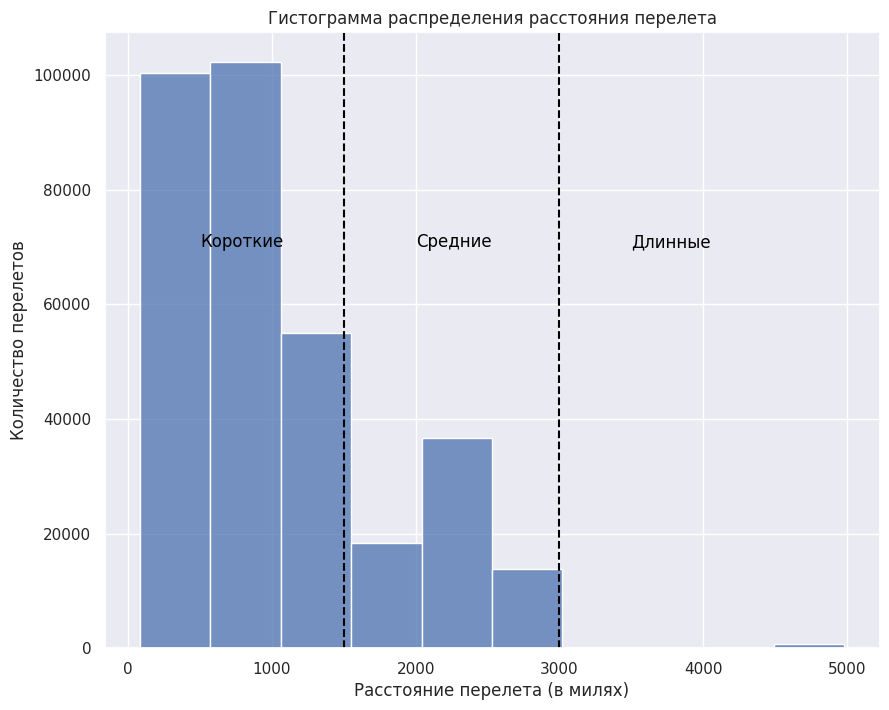

In [ ]:
sns.histplot(df, x="distance", bins=10)
plt.title('Гистограмма распределения расстояния перелета')
plt.ylabel('Количество перелетов')
plt.xlabel('Расстояние перелета (в милях)')
plt.axvline(x=1500, color='black', linestyle='--')
plt.axvline(x=3000, color='black', linestyle='--')
plt.text(500, 70000, 'Короткие', fontsize=12, color='black')
plt.text(2000, 70000, 'Средние', fontsize=12, color='black')
plt.text(3500, 70000, 'Длинные', fontsize=12, color='black')


Было выбрано следующее разделение на группы:
<br>

distance <= 1500 миль - Короткие
<br>

1500 миль < distance <= 3000 миль - Средние
<br>

distance > 3000 миль - Длинные

 ***Найдите среднее время задержки вылета в каждой из трех выделенных групп.***

In [ ]:
df['disttype'] = df['distance'].apply(lambda x: 0 if x <= 1500 else (1 if 1500 < x <= 3000 else 2))

dfshort = df[df['disttype'] == 0]
dfmid = df[df['disttype'] == 1]
dflong = df[df['disttype'] == 2]

print('Среднее время задержки вылета коротких перелетов', round(dfshort['dep_delay'].mean(), 2), 'минут')
print('Среднее время задержки вылета средних перелетов', round(dfmid['dep_delay'].mean(), 2), 'минут')
print('Среднее время задержки вылета длинных перелетов', round(dflong['dep_delay'].mean(), 2), 'минут')

Среднее время задержки вылета коротких перелетов 12.93 минут
Среднее время задержки вылета средних перелетов 11.24 минут
Среднее время задержки вылета длинных перелетов 9.36 минут


 ***Куда летят самолеты в группе длинных перелетов?***

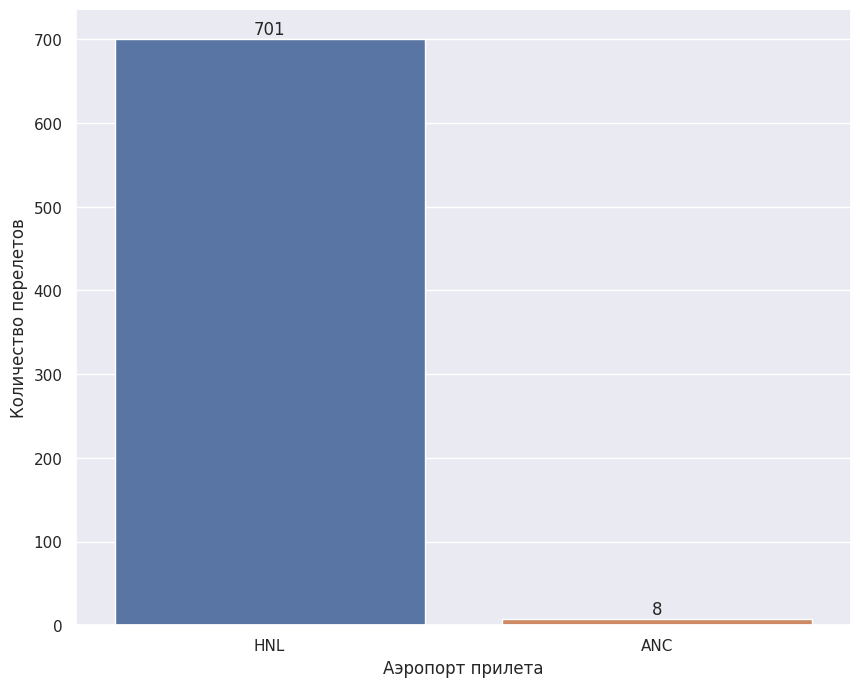

In [ ]:
ax = sns.countplot(data=dflong, x='dest', hue='dest')
plt.ylabel('Количество перелетов')
plt.xlabel('Аэропорт прилета')
for i in ax.containers:
  ax.bar_label(i,)

В группе длинных перелетов самолеты почти исключительно летят в аэропорт HNL (Daniel K. Inouye International Airport), однако 8 из 709 были совершены в аэропорт ANC (Ted Stevens Anchorage International Airport)

<h2>Задание 3</h2>

Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95. С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01?

In [ ]:
def sdadj(x):

  n = len(x)
  m = sum(x)/n
  s = 0
  for i in x:
    s+= (i-m)**2

  s = (s/(n-1))**0.5
  return s


***Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95***

Text(0.5, 0, 'Среднее время задержки (мин.)')

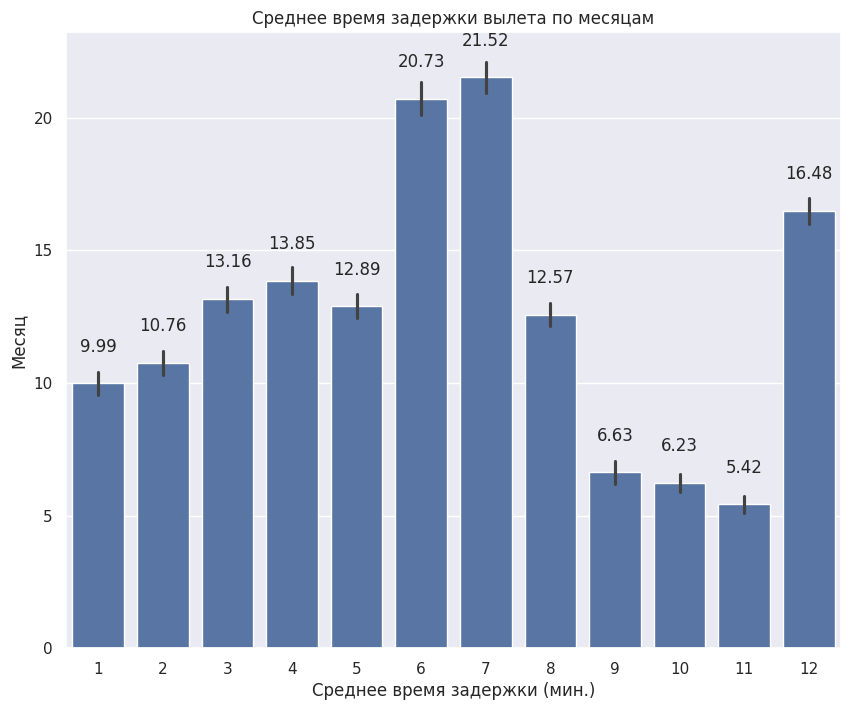

In [ ]:
#для построения доверительного интервала воспользуемся распределением Стюдента, квантиль 0.95 распределения Стьюдента равен 1.96
#тогда доверительный интервал для среднего = [M-1.96*SD/sqrt(n); M+1.96*SD/sqrt(n)], M-среднее, SD - стандартное отклонение
ax = sns.barplot(x='month', y='dep_delay', data=df, errorbar = (lambda x: (x.mean()-1.96*sdadj(x)/(len(x)**0.5), x.mean()+1.96*sdadj(x)/(len(x)**0.5))))
for i in ax.containers:
  ax.bar_label(i,fmt='%.2f', padding = 20)

plt.title('Среднее время задержки вылета по месяцам')
plt.ylabel('Месяц')
plt.xlabel('Среднее время задержки (мин.)')

***С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05?на уровне значимости 0.01?***

Для проверки гипотезы о равенстве средних испольхуем двусторонний t-тест для независимых выборок с предположением о равенстве дисперсий

In [ ]:
jandf = df[df['month'] == 1]
jan = jandf['dep_delay']

febdf = df[df['month'] == 2]
feb = febdf['dep_delay']

scipy.stats.ttest_ind(jan, feb)

TtestResult(statistic=-2.386498623322741, pvalue=0.017013366495100535, df=50007.0)

Гипотезу о равенстве средних (нулевую гипотезу) можно отвергнуть на уровне значимости 0.05, но нельзя отвергнуть на уровне значимости 0.01 (0.01 < p-value < 0.05).

<h2>Задание 4</h2>

***Найдите коэффициент корреляции между расстоянием distance и временем полета air_time. Постройте точечную диаграмму в осях distance (х) и air_time (y). Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. Как можно интерпретировать смысл коэффициентов полученной линейной модели?***



In [ ]:
#коэфициент корреляции
corr_coef = df['distance'].corr(df['air_time'])

model = LinearRegression()

x = np.array(df['distance']).reshape((-1, 1))
y = df['air_time']

model.fit(x, y)
#y=kx+b

k = model.coef_[0]
b = model.intercept_

print("Коэфициент корреляции", corr_coef)
print(f"Угловой коэфициент k = {k:.2f}")
print(f"Коэфициент b = {b:.2f}")
print(f"Прямая y = {k:.2f}x + {b:.2f}")

Коэфициент корреляции 0.990649647224859
Угловой коэфициент k = 0.13
Коэфициент b = 18.47
Прямая y = 0.13x + 18.47


Text(0.5, 0, 'Расстояние (в милях)')

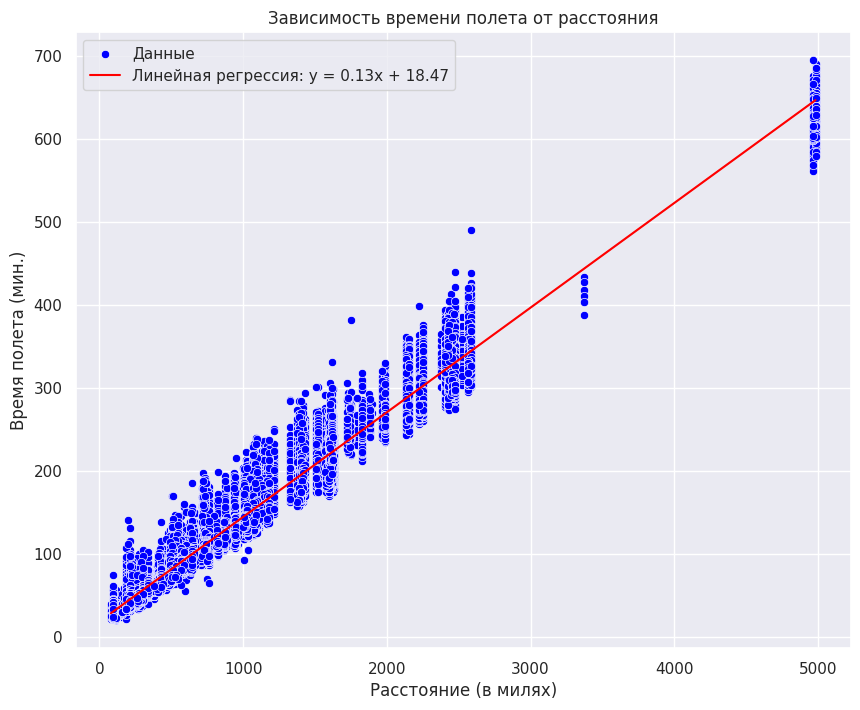

In [ ]:
sns.scatterplot(data=df, x='distance', y='air_time', color='blue', label='Данные')
sns.lineplot(x=df['distance'], y=model.predict(x), color='red', label=f'Линейная регрессия: y = {k:.2f}x + {b:.2f}')
plt.title('Зависимость времени полета от расстояния')
plt.ylabel('Время полета (мин.)')
plt.xlabel('Расстояние (в милях)')

Значения коэфициентов регрессии можно интерпретировать следующим образом:

Поскольку коэфициент корреляции между временем полета и расстоянием высок (>0.95), между ними есть линейная зависимость вида y=kx+b, где y - время полета, x - расстояние. В результате выполнения линейой регрессии можно получить эти коэфициенты. В контексте данной задачи коэфициент k можно интерпретировать как среднюю скорость полета (миль/мин), а коэфициент b - как минимальное время полета (мин.).

<h2>Задание 5</h2>

***Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. Сделайте предположение о том, каким распределением может описываться полученная гистограмма, оцените параметры этого распределения и нанесите график плотности на график с гистограммой. Вопрос со звездочкой (необязательный): с помощью подходящего статистического теста проверьте, можно ли принять гипотезу о выбранном распределении?***



Text(0.5, 0, 'Задержка прилета (мин.)')

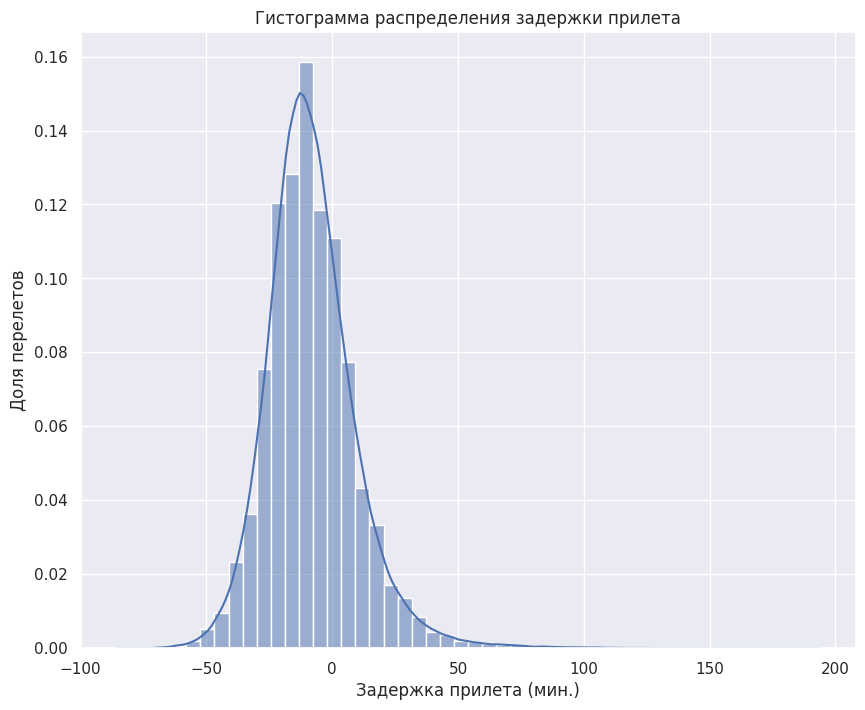

In [ ]:
df['dep_delay_type'] = df['dep_delay'].apply(lambda x: 0 if abs(x) > 15 else 1)

df15 = df[df['dep_delay_type']==1]
sns.histplot(df15, x="arr_delay", bins=50, stat="probability", kde=True)
plt.title('Гистограмма распределения задержки прилета')
plt.ylabel('Доля перелетов')
plt.xlabel('Задержка прилета (мин.)')


In [ ]:
#параметры распределения
df15['arr_delay'].describe()

count    256608.000000
mean         -8.251115
std          17.907215
min         -86.000000
25%         -20.000000
50%         -10.000000
75%           1.000000
max         194.000000
Name: arr_delay, dtype: float64

In [ ]:
M = df15['arr_delay'].mean()
S = df15['arr_delay'].std()


Предположим, что задержка прилета имеет нормальное распределение со средним -8.25 и стандартным отклонением 17.91. Проверим эту гипотезу при помощи теста Колмогорова-Смирнова.

In [ ]:
Normal = np.random.normal(M, S, len(df15))
scipy.stats.kstest(np.array(df15['arr_delay']), Normal)

KstestResult(statistic=0.06469400798104497, pvalue=0.0, statistic_location=-3.0, statistic_sign=1)

Поскольку pvalue настолько мало настолько, что не отображается, нулевая гипотеза о том что распределение нормальное c предложенными параметрами отвергается на любом разумном уровне значимости.

<h2>Задание 6</h2>

***Постройте модель логистической регрессии, которая будет предсказывать, что задержка прилета составит более 15 минут. Какие признаки вы будете использовать? Какие новые признаки, на основе имеющихся, можете предложить? Какова точность полученной модели (precision, recall, accuracy)? Вопрос со звездочкой (необязательный): изучите случаи, на которых модель ошибается – с чем связаны ошибки и как можно улучшить модель?***

Добавим один признак - время суток, в которое начался полет (time_type). Cтроковые переменные перевозчик и аэропорт вылета (carrier и origin) заменим на числовые и тоже используем для модели. Помимо перечисленных признаков используем также месяц, дальность перелета и задержку вылета (month, distance, dep_delay). Используем 30% данных для обучения и остальные 70% для тестирования модели.

In [ ]:
df['arr_delay_type'] = df['arr_delay'].apply(lambda x: 0 if x<15 else 1)

def time_typer(x):
  ans = str(x)[:-2]
  if len(ans) == 3:
    ans = '0'+ans

  ans = ans[0:2]
  if ans in ('00', '01', '02', '03', '04', '05'):
    return 0

  elif ans in ('06', '07', '08', '09', '10', '11'):
    return 1

  elif ans in ('12', '13', '14', '15', '16', '17'):
    return 2
  else:
    return 3

df['time_type'] = df['dep_time'].apply(lambda x: time_typer(x))
data = df[['month', 'distance', 'dep_delay', 'carrier', 'origin', 'time_type', 'arr_delay_type']]

data['carrier'] = LabelEncoder().fit_transform(data['carrier'])
data['origin'] = LabelEncoder().fit_transform(data['origin'])
data = pd.DataFrame(data)
data.describe()



<ipython-input-46-4f7c563575ac>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['carrier'] = LabelEncoder().fit_transform(data['carrier'])
<ipython-input-46-4f7c563575ac>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['origin'] = LabelEncoder().fit_transform(data['origin'])


,month,distance,dep_delay,carrier,origin,time_type,arr_delay_type
count,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,6.564803,1048.371314,12.555156,6.150104,0.951162,1.815095,0.244695
std,3.413444,735.908523,40.065688,4.138973,0.815104,0.818477,0.429907
min,1.000000,80.000000,-43.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,509.000000,-5.000000,3.000000,0.000000,1.000000,0.000000
50%,7.000000,888.000000,-2.000000,5.000000,1.000000,2.000000,0.000000
75%,10.000000,1389.000000,11.000000,11.000000,2.000000,2.000000,0.000000
max,12.000000,4983.000000,1301.000000,15.000000,2.000000,3.000000,1.000000


In [ ]:

X = data[['month', 'distance', 'dep_delay', 'carrier', 'origin', 'time_type']]
y = data['arr_delay_type']

#разделение данных на тестовую (70%) и обучающую (30%) выборки
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0)

In [ ]:
log_regression = LogisticRegression(max_iter=10000)
log_regression.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = log_regression.predict(X_test)
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[72000,  2192],
       [ 8025, 15987]])

На тестовой выборке:

Истинно положительных прогнозов 72000

Истинно отрицательных прогнозов 2192

Ложноположительных прогнозов 8025

Ложноотрицательных прогнозов 15987

In [ ]:
print(" Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(" Precision:", metrics.precision_score(y_test, y_pred))
print(" Recall:", metrics.recall_score(y_test, y_pred))

 Accuracy: 0.895961467964645
 Precision: 0.879421310303097
 Recall: 0.665792103948026
